In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset

plt.style.use('dark_background')

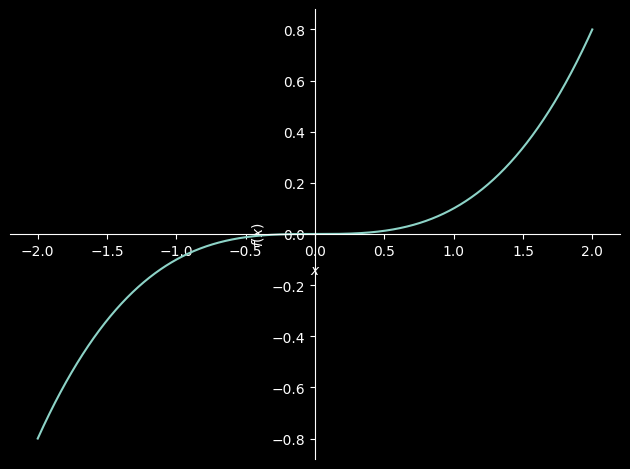

In [2]:
x_alg = sympy.symbols('x')
w = sympy.symbols('w')
y = w * x_alg ** 3

sympy.plot(0.1 * x_alg ** 3, (x_alg, -2, 2))

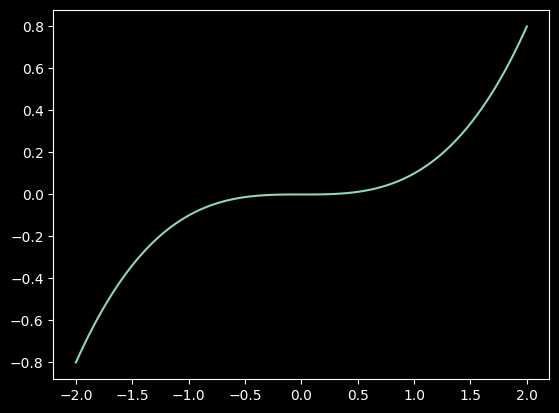

In [3]:
x_tensor = torch.linspace(-2, 2, 100).reshape(-1, 1)
y_tensor = 0.1 * x_tensor ** 3

plt.plot(x_tensor.numpy(), y_tensor.numpy())

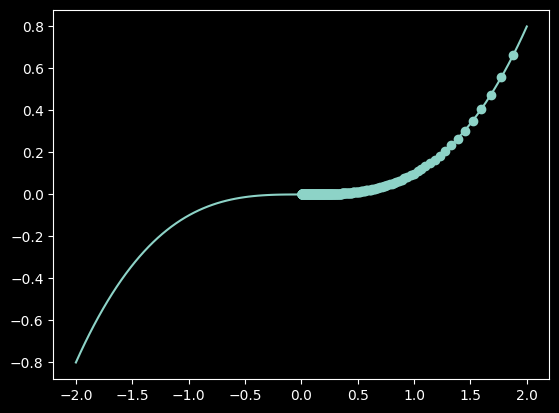

In [89]:
w = 2
alpha = 0.1

w_iters = []
w_losses = []
for epoch in range(10000):
    dw = 0.1 * 3 * w ** 2
    w = w - alpha * dw
    w_iters.append(w)
    w_losses.append(0.1 * w ** 3)

plt.plot(x_tensor.numpy(), y_tensor.numpy())
plt.scatter(w_iters, w_losses)

In [4]:
class Model(nn.Module):
    def __init__(self, w_init=2):
        super().__init__()
        self.w = nn.Parameter(torch.tensor(w_init, requires_grad=True, dtype=torch.float))

    def forward(self):
        return 0.1 * self.w ** 3
    
    def predict(self):
        with torch.no_grad():
            return self.forward().item()
    
    def get_w(self):
        return self.w.detach().item()

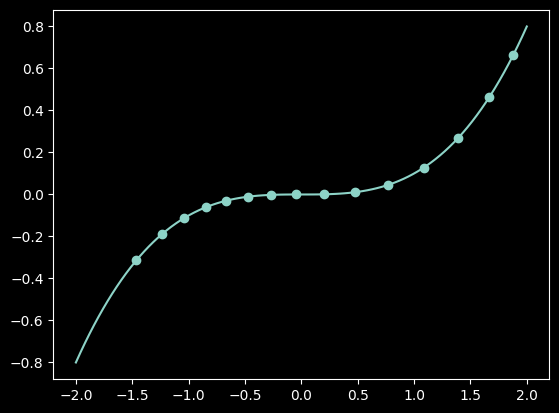

In [43]:
model = Model(2)
lr = 0.1
momentum = 0.9
epochs = 15
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

w_iters = []
w_losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = model()
    loss.backward()
    optimizer.step()
    
    w_iters.append(model.get_w())
    w_losses.append(model.predict())


plt.plot(x_tensor.numpy(), y_tensor.numpy())
plt.scatter(w_iters, w_losses)

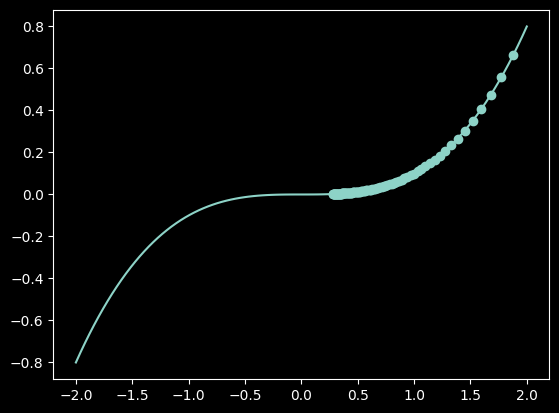

In [10]:
plt.plot(x_tensor.numpy(), y_tensor.numpy())
plt.scatter(w_iters, w_losses)